In [41]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import plotly.express as px
from PIL import Image

In [42]:
data_path = os.path.join('../data/kaggle-handwriting-recognition/')
train_image_path = os.path.join('../data/kaggle-handwriting-recognition/train_v2/train/')
val_image_path = os.path.join('../data/kaggle-handwriting-recognition/validation_v2/validation/')
test_image_path = os.path.join('../data/kaggle-handwriting-recognition/test_v2/test/')

In [87]:
train_data = pd.read_csv(os.path.join(data_path, 'written_name_train_v2.csv'))
val_data = pd.read_csv(os.path.join(data_path, 'written_name_validation_v2.csv'))
test_data = pd.read_csv(os.path.join(data_path, 'written_name_test_v2.csv'))

In [88]:
train_data.head()

FILENAME   IDENTITY
0  TRAIN_00001.jpg  BALTHAZAR
1  TRAIN_00002.jpg      SIMON
2  TRAIN_00003.jpg      BENES
3  TRAIN_00004.jpg    LA LOVE
4  TRAIN_00005.jpg     DAPHNE

In [89]:
val_data.head()

FILENAME    IDENTITY
0  VALIDATION_0001.jpg       BILEL
1  VALIDATION_0002.jpg  LAUMIONIER
2  VALIDATION_0003.jpg         LEA
3  VALIDATION_0004.jpg   JEAN-ROCH
4  VALIDATION_0005.jpg        RUPP

In [90]:
test_data.head()

FILENAME  IDENTITY
0  TEST_0001.jpg     KEVIN
1  TEST_0002.jpg  CLOTAIRE
2  TEST_0003.jpg      LENA
3  TEST_0004.jpg     JULES
4  TEST_0005.jpg   CHERPIN

In [91]:
# It looks like there are null identities in train, val and test data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330961 entries, 0 to 330960
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   FILENAME  330961 non-null  object
 1   IDENTITY  330396 non-null  object
dtypes: object(2)
memory usage: 5.1+ MB


In [92]:
val_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41370 entries, 0 to 41369
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   FILENAME  41370 non-null  object
 1   IDENTITY  41292 non-null  object
dtypes: object(2)
memory usage: 646.5+ KB


In [93]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41370 entries, 0 to 41369
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   FILENAME  41370 non-null  object
 1   IDENTITY  41300 non-null  object
dtypes: object(2)
memory usage: 646.5+ KB


In [94]:
# checking null identities
train_data[train_data['IDENTITY'].isnull()]

FILENAME IDENTITY
1913     TRAIN_01914.jpg      NaN
2129     TRAIN_02130.jpg      NaN
2624     TRAIN_02625.jpg      NaN
4628     TRAIN_04629.jpg      NaN
4872     TRAIN_04873.jpg      NaN
...                  ...      ...
328491  TRAIN_328492.jpg      NaN
328653  TRAIN_328654.jpg      NaN
329959  TRAIN_329960.jpg      NaN
330160  TRAIN_330161.jpg      NaN
330164  TRAIN_330165.jpg      NaN

[565 rows x 2 columns]

In [95]:
# Lets remove all the rows having null identities
train_df = train_data.dropna()
val_df = val_data.dropna()
test_df = test_data.dropna()

In [96]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330396 entries, 0 to 330960
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   FILENAME  330396 non-null  object
 1   IDENTITY  330396 non-null  object
dtypes: object(2)
memory usage: 7.6+ MB


In [97]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41292 entries, 0 to 41369
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   FILENAME  41292 non-null  object
 1   IDENTITY  41292 non-null  object
dtypes: object(2)
memory usage: 967.8+ KB


In [98]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41300 entries, 0 to 41369
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   FILENAME  41300 non-null  object
 1   IDENTITY  41300 non-null  object
dtypes: object(2)
memory usage: 968.0+ KB


In [99]:
# saving the updated dataframes
train_df.to_csv(os.path.join(data_path, 'train_new.csv'), index=False)
val_df.to_csv(os.path.join(data_path, 'val_new.csv'), index=False)
test_df.to_csv(os.path.join(data_path, 'test_new.csv'), index=False)

In [100]:
train_df = pd.read_csv(os.path.join(data_path, 'train_new.csv'))
val_df = pd.read_csv(os.path.join(data_path, 'val_new.csv'))
test_df = pd.read_csv(os.path.join(data_path, 'test_new.csv'))

In [101]:
## Checking the target characters to predict and their distribution
all_train_identities = train_df.IDENTITY

In [102]:
all_train_identities = list(all_train_identities)
all_train_identities

['BALTHAZAR', 'SIMON', 'BENES', 'LA LOVE', 'DAPHNE', 'LUCIE', 'NASSIM', 'ASSRAOUI', 'LAVIAN', 'MAEVA', 'EMMA', 'MOULINIER', 'ELISE', 'HONNERT', 'MATHEO', 'PETITDIDIER', 'PAULINE', 'LOUVENAZ', 'BOURQUIN', 'ROMAIN', 'ASMA', 'CYRIELLE', 'LILOU', 'ESTEBANN', 'MITHIEUX', 'MARION', 'THOMAS', 'ANAIS', 'BROLL', 'JAFFEUX', 'ANNE', 'PREVOST', 'ROMANE', 'BRUGERIE', 'NOLAN', 'LORENTIN', 'ELISA', 'PAULINE', 'FRANCOIS', 'MAUPAS', 'MEISSA', 'REBACH', 'ERWAN', 'AMBROISE', 'LAURA', 'AHMED-KHODJA', 'LOISE', 'ELBAKKALI', 'BENZINA', 'LAQUERRIERE', 'YAEL', 'VITRE', 'GUILLOT GOGUET', 'BOLOZAN', 'MATHEO', 'SHA I', 'VICTORIA', 'JULIE', 'BARBIER', 'GILLES-LAWRENCE', 'DUPRAT', 'LABARH', 'REMI', 'BLANLO', 'ARGITXU', 'SINEM', 'LISON', 'PAYEN-MERLE', 'INES', 'NAWFEL', 'WADSWORRE', 'CROCHARD', 'FREDERIC', 'RODRIGUES', 'AUBANE', 'ELISA', 'ACHOURI', 'MAEVA', 'GRINAND', 'ANTOINE', 'SANA', 'ENZO', 'DOMAS', 'MALOLEPSZY', 'THOMAS', 'JULIE', 'KADIR EREN', 'PERIOL', 'BGUGEAU', 'SOCHET', 'TROUVAT', 'GARGUEB', 'CORALIE', 'VA

In [6]:
# find all unique characters and their counts
def get_all_unique_chars(identities):
    unique_characters = {}
    for word in tqdm(identities):
        chars = list(word)
        for char in chars:
            if char in unique_characters:
                unique_characters[char] += 1
            else:
                unique_characters[char] = 1
    return unique_characters

In [104]:
unique_train_chars = get_all_unique_chars(all_train_identities)

100%|██████████| 330396/330396 [00:00<00:00, 1601405.74it/s]


In [105]:
unique_train_chars

{'B': 45962, 'A': 269646, 'L': 161191, 'T': 101542, 'H': 61722, 'Z': 14175, 'R': 148353, 'S': 91415, 'I': 173892, 'M': 83716, 'O': 136375, 'N': 167202, 'E': 270837, ' ': 10417, 'V': 25093, 'D': 60503, 'P': 29599, 'U': 96414, 'C': 68139, 'Q': 5166, 'Y': 30828, 'X': 11342, 'J': 15804, 'F': 18284, 'G': 39134, 'W': 5505, '-': 6607, 'K': 14082, "'": 253, 'o': 10, 's': 4, 'y': 2, 'u': 3, 'c': 5, 'e': 12, 'l': 10, 'p': 4, 't': 6, 'r': 11, 'z': 2, 'h': 2, 'i': 7, 'm': 2, 'n': 2, 'b': 4, 'g': 1, 'a': 10, 'v': 1, 'f': 3, '`': 1}

In [106]:
all_val_identities = list(val_df.IDENTITY)
unique_val_chars = get_all_unique_chars(all_val_identities)
unique_val_chars

100%|██████████| 41292/41292 [00:00<00:00, 1430268.40it/s]


{'B': 5760, 'I': 21704, 'L': 20115, 'E': 33962, 'A': 33740, 'U': 12097, 'M': 10484, 'O': 17113, 'N': 20984, 'R': 18717, 'J': 2031, '-': 831, 'C': 8473, 'H': 7739, 'P': 3654, 'D': 7531, 'Y': 3863, 'G': 4898, 'T': 12718, 'F': 2389, 'V': 3166, 'S': 11208, 'Q': 640, ' ': 1233, 'Z': 1767, 'X': 1453, 'K': 1757, 'W': 710, "'": 26, 'p': 1, 'o': 2, 'u': 1, 'l': 1, 'a': 2, 'i': 1, 'n': 1, 'g': 1, 'r': 1, 's': 2, 't': 1}

In [107]:
all_test_identities = list(test_df.IDENTITY)
unique_test_chars = get_all_unique_chars(all_test_identities)
unique_test_chars

100%|██████████| 41300/41300 [00:00<00:00, 1253272.04it/s]


{'K': 1819, 'E': 33915, 'V': 3141, 'I': 21954, 'N': 20903, 'C': 8565, 'L': 20259, 'O': 17163, 'T': 12495, 'A': 33494, 'R': 18459, 'J': 2004, 'U': 12031, 'S': 11377, 'H': 7631, 'P': 3653, 'M': 10456, 'B': 5729, 'Z': 1792, 'G': 4936, 'F': 2182, 'D': 7641, ' ': 1341, '-': 845, 'Y': 3830, 'X': 1399, 'W': 687, 'Q': 642, "'": 23, 'e': 2, 'o': 1, 'd': 1, 'a': 2, 't': 2, 'i': 1, 'l': 1, 'u': 2, 'c': 1, 's': 1, 'f': 1, 'r': 1}

In [108]:
keys_dont_consider = []
for key in unique_train_chars.keys():
    if unique_train_chars[key] <= 1000:
        keys_dont_consider.append(key)
keys_dont_consider

["'", 'o', 's', 'y', 'u', 'c', 'e', 'l', 'p', 't', 'r', 'z', 'h', 'i', 'm', 'n', 'b', 'g', 'a', 'v', 'f', '`']

In [109]:
# Small letters and digits are very few in number. Lets consider only capital letters as classes for simplicity
def contains_undesirable_chars(string):
    chars = list(string)
    char_list = ["'", 'o', 's', 'y', 'u', 'c', 'e', 'l', 'p', 't', 'r', 'z', 'h', 'i', 'm', 'n', 'b', 'g', 'a', 'v', 'f', '`']
    for char in chars:
        if char in char_list:
            return "low_resource_word"
    return "normal_word"

In [110]:
tqdm.pandas()

In [111]:
train_df['word_type'] = train_df['IDENTITY'].progress_apply(lambda x: contains_undesirable_chars(x))

100%|██████████| 330396/330396 [00:00<00:00, 587645.15it/s]


In [112]:
train_df.head()

FILENAME   IDENTITY    word_type
0  TRAIN_00001.jpg  BALTHAZAR  normal_word
1  TRAIN_00002.jpg      SIMON  normal_word
2  TRAIN_00003.jpg      BENES  normal_word
3  TRAIN_00004.jpg    LA LOVE  normal_word
4  TRAIN_00005.jpg     DAPHNE  normal_word

In [113]:
val_df['word_type'] = val_df['IDENTITY'].progress_apply(lambda x: contains_undesirable_chars(x))

100%|██████████| 41292/41292 [00:00<00:00, 538632.02it/s]


In [114]:
val_df.head()

FILENAME    IDENTITY    word_type
0  VALIDATION_0001.jpg       BILEL  normal_word
1  VALIDATION_0002.jpg  LAUMIONIER  normal_word
2  VALIDATION_0003.jpg         LEA  normal_word
3  VALIDATION_0004.jpg   JEAN-ROCH  normal_word
4  VALIDATION_0005.jpg        RUPP  normal_word

In [115]:
test_df['word_type'] = test_df['IDENTITY'].progress_apply(lambda x: contains_undesirable_chars(x))

100%|██████████| 41300/41300 [00:00<00:00, 531889.64it/s]


In [116]:
test_df.head()

FILENAME  IDENTITY    word_type
0  TEST_0001.jpg     KEVIN  normal_word
1  TEST_0002.jpg  CLOTAIRE  normal_word
2  TEST_0003.jpg      LENA  normal_word
3  TEST_0004.jpg     JULES  normal_word
4  TEST_0005.jpg   CHERPIN  normal_word

In [117]:
train_df[train_df.word_type == 'low_resource_word']

FILENAME          IDENTITY          word_type
259      TRAIN_00260.jpg             LE'DU  low_resource_word
3888     TRAIN_03892.jpg             Rosso  low_resource_word
4455     TRAIN_04459.jpg  FAIVRE D' ARCIER  low_resource_word
5538     TRAIN_05544.jpg        D'HERBOMEZ  low_resource_word
5826     TRAIN_05832.jpg     D' HEROUVILLE  low_resource_word
...                  ...               ...                ...
325791  TRAIN_326349.jpg   LE ROUX D'ORVEN  low_resource_word
326818  TRAIN_327378.jpg  BOKONGA W'OKONGO  low_resource_word
326916  TRAIN_327476.jpg           BONT'E'  low_resource_word
327993  TRAIN_328555.jpg        M'ORANDINI  low_resource_word
330080  TRAIN_330646.jpg         D' ARLENT  low_resource_word

[258 rows x 3 columns]

In [118]:
# saving the updated dataframes
train_df.to_csv(os.path.join(data_path, 'train_new.csv'), index=False)
val_df.to_csv(os.path.join(data_path, 'val_new.csv'), index=False)
test_df.to_csv(os.path.join(data_path, 'test_new.csv'), index=False)

In [12]:
train_df = pd.read_csv(os.path.join(data_path, 'train_new.csv'))
val_df = pd.read_csv(os.path.join(data_path, 'val_new.csv'))
test_df = pd.read_csv(os.path.join(data_path, 'test_new.csv'))

In [14]:
# count the length of identitiy names
train_df['identity_len'] = train_df['IDENTITY'].apply(lambda x : len(x))
val_df['identity_len'] = val_df['IDENTITY'].apply(lambda x : len(x))
test_df['identity_len'] = test_df['IDENTITY'].apply(lambda x: len(x))

In [16]:
train_df = train_df[train_df.word_type == 'normal_word']
val_df = val_df[val_df.word_type == 'normal_word']
test_df = test_df[test_df.word_type == 'normal_word']

In [18]:
train_df['identity_len'].describe()

count    330138.000000
mean          6.545781
std           2.122057
min           1.000000
25%           5.000000
50%           6.000000
75%           7.000000
max          34.000000
Name: identity_len, dtype: float64

In [19]:
val_df['identity_len'].describe()

count    41265.000000
mean         6.556622
std          2.126967
min          1.000000
25%          5.000000
50%          6.000000
75%          7.000000
max         21.000000
Name: identity_len, dtype: float64

In [20]:
test_df['identity_len'].describe()

count    41274.000000
mean         6.545016
std          2.136232
min          1.000000
25%          5.000000
50%          6.000000
75%          7.000000
max         24.000000
Name: identity_len, dtype: float64

In [32]:
# Some extreme identity char length examples..
train_df[(train_df.identity_len >15) & (train_df.identity_len <= 20)]

FILENAME             IDENTITY    word_type  identity_len
336      TRAIN_00337.jpg     MOKHTAR-DIDOUCHE  normal_word            16
412      TRAIN_00413.jpg    DUSSAIGNE RAPHAEL  normal_word            17
817      TRAIN_00818.jpg  DI - BIN - LOMBARDI  normal_word            19
1092     TRAIN_01093.jpg     DUROUX--RATIGNER  normal_word            16
1192     TRAIN_01193.jpg    GILLI - BELLANGER  normal_word            17
...                  ...                  ...          ...           ...
329520  TRAIN_330084.jpg     QUIGNARD-LEFEVRE  normal_word            16
329546  TRAIN_330110.jpg     MARTIN DE KERGUR  normal_word            16
329677  TRAIN_330243.jpg     DE REBOUL FREMON  normal_word            16
329816  TRAIN_330382.jpg     DEAISBOURG-MEYER  normal_word            16
330032  TRAIN_330598.jpg     MONNEROT-DUMAINE  normal_word            16

[2020 rows x 4 columns]

In [25]:
# the 34 length sample looks like this.. As can be seen this won't work in basic cases
the_image = Image.open(os.path.join(train_image_path, 'TRAIN_39215.jpg'))
the_image

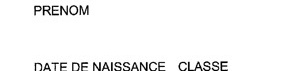

In [28]:
the_image = Image.open(os.path.join(train_image_path, 'TRAIN_09503.jpg'))
the_image

### Lets consider all the labels with length greater than 20 as problamatic or mislabelled and consider only length less or equal to 20 data samples

In [33]:
train_df = train_df[train_df.identity_len <= 20]
val_df = val_df[val_df.identity_len <= 20]
test_df = test_df[test_df.identity_len <= 20]

In [38]:
train_df.shape, val_df.shape, test_df.shape

((330118, 4), (41264, 4), (41271, 4))

In [39]:
all_train_identities = list(train_df.IDENTITY)
unique_train_chars = get_all_unique_chars(all_train_identities)
unique_train_chars

100%|██████████| 330118/330118 [00:00<00:00, 1595653.14it/s]


{'B': 45912,
 'A': 269427,
 'L': 161013,
 'T': 101459,
 'H': 61612,
 'Z': 14163,
 'R': 148201,
 'S': 91324,
 'I': 173727,
 'M': 83611,
 'O': 136200,
 'N': 167063,
 'E': 270569,
 ' ': 10270,
 'V': 25061,
 'D': 60353,
 'P': 29574,
 'U': 96321,
 'C': 68069,
 'Q': 5164,
 'Y': 30803,
 'X': 11338,
 'J': 15801,
 'F': 18272,
 'G': 39097,
 'W': 5502,
 '-': 6590,
 'K': 14070}

In [40]:
all_val_identities = list(val_df.IDENTITY)
unique_val_chars = get_all_unique_chars(all_val_identities)
unique_val_chars

100%|██████████| 41264/41264 [00:00<00:00, 1337344.38it/s]


{'B': 5757,
 'I': 21697,
 'L': 20098,
 'E': 33939,
 'A': 33721,
 'U': 12085,
 'M': 10473,
 'O': 17096,
 'N': 20969,
 'R': 18707,
 'J': 2031,
 '-': 831,
 'C': 8464,
 'H': 7728,
 'P': 3651,
 'D': 7517,
 'Y': 3861,
 'G': 4896,
 'T': 12714,
 'F': 2389,
 'V': 3163,
 'S': 11200,
 'Q': 640,
 ' ': 1226,
 'Z': 1765,
 'X': 1453,
 'K': 1757,
 'W': 710}

In [41]:
all_test_identities = list(test_df.IDENTITY)
unique_test_chars = get_all_unique_chars(all_test_identities)
unique_test_chars

100%|██████████| 41271/41271 [00:00<00:00, 1307306.89it/s]


{'K': 1817,
 'E': 33886,
 'V': 3137,
 'I': 21938,
 'N': 20883,
 'C': 8555,
 'L': 20238,
 'O': 17149,
 'T': 12487,
 'A': 33461,
 'R': 18437,
 'J': 2003,
 'U': 12020,
 'S': 11363,
 'H': 7624,
 'P': 3653,
 'M': 10447,
 'B': 5727,
 'Z': 1792,
 'G': 4932,
 'F': 2178,
 'D': 7624,
 ' ': 1320,
 '-': 845,
 'Y': 3827,
 'X': 1399,
 'W': 686,
 'Q': 642}

In [42]:
train_classes = sorted(list(unique_train_chars.keys()))
val_classes = sorted(list(unique_val_chars.keys()))
test_classes = sorted(list(unique_test_chars.keys()))
print(train_classes)
print(val_classes)
print(test_classes)

[' ', '-', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
[' ', '-', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
[' ', '-', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [43]:
indexes = [i for i in range(len(list(unique_train_chars.keys())))]
print(indexes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]


In [44]:
index_to_labels = dict(zip(indexes, train_classes))

In [48]:
# total number of classes are 28
print(len(index_to_labels))
print(index_to_labels)

28
{0: ' ', 1: '-', 2: 'A', 3: 'B', 4: 'C', 5: 'D', 6: 'E', 7: 'F', 8: 'G', 9: 'H', 10: 'I', 11: 'J', 12: 'K', 13: 'L', 14: 'M', 15: 'N', 16: 'O', 17: 'P', 18: 'Q', 19: 'R', 20: 'S', 21: 'T', 22: 'U', 23: 'V', 24: 'W', 25: 'X', 26: 'Y', 27: 'Z'}


In [50]:
labels_to_index = dict(zip(train_classes, indexes))
print(labels_to_index)

{' ': 0, '-': 1, 'A': 2, 'B': 3, 'C': 4, 'D': 5, 'E': 6, 'F': 7, 'G': 8, 'H': 9, 'I': 10, 'J': 11, 'K': 12, 'L': 13, 'M': 14, 'N': 15, 'O': 16, 'P': 17, 'Q': 18, 'R': 19, 'S': 20, 'T': 21, 'U': 22, 'V': 23, 'W': 24, 'X': 25, 'Y': 26, 'Z': 27}


In [46]:
# Save these cleaned dataframes for further processing..
train_df.to_csv(os.path.join(data_path, 'train_new.csv'), index=False)
val_df.to_csv(os.path.join(data_path, 'val_new.csv'), index=False)
test_df.to_csv(os.path.join(data_path, 'test_new.csv'), index=False)

In [43]:
train_df = pd.read_csv(os.path.join(data_path, 'train_new.csv'))
val_df = pd.read_csv(os.path.join(data_path, 'val_new.csv'))
test_df = pd.read_csv(os.path.join(data_path, 'test_new.csv'))

### Checking the images characteristics

In [5]:
def get_resolution(path):
    with Image.open(os.path.join(train_image_path, path)) as img:
        width, height = img.size
    return width, height

In [6]:
train_df['resolution'] = train_df.apply(lambda x : get_resolution(x['FILENAME']), axis='columns')

In [7]:
train_df.head()

FILENAME   IDENTITY    word_type  identity_len resolution
0  TRAIN_00001.jpg  BALTHAZAR  normal_word             9  (284, 50)
1  TRAIN_00002.jpg      SIMON  normal_word             5  (284, 62)
2  TRAIN_00003.jpg      BENES  normal_word             5  (324, 44)
3  TRAIN_00004.jpg    LA LOVE  normal_word             7  (284, 50)
4  TRAIN_00005.jpg     DAPHNE  normal_word             6  (388, 30)

In [20]:
train_df['image_width'] = train_df['resolution'].apply(lambda x : x[0])
train_df['image_height'] = train_df['resolution'].apply(lambda x : x[1])

In [21]:
train_df.head()

FILENAME   IDENTITY    word_type  identity_len resolution  \
0  TRAIN_00001.jpg  BALTHAZAR  normal_word             9  (284, 50)   
1  TRAIN_00002.jpg      SIMON  normal_word             5  (284, 62)   
2  TRAIN_00003.jpg      BENES  normal_word             5  (324, 44)   
3  TRAIN_00004.jpg    LA LOVE  normal_word             7  (284, 50)   
4  TRAIN_00005.jpg     DAPHNE  normal_word             6  (388, 30)   

   image_width  image_height  
0          284            50  
1          284            62  
2          324            44  
3          284            50  
4          388            30

In [11]:
def get_resolution(path):
    with Image.open(os.path.join(val_image_path, path)) as img:
        width, height = img.size
    return width, height

In [12]:
val_df['resolution'] = val_df.apply(lambda x : get_resolution(x['FILENAME']), axis='columns')

In [22]:
val_df['image_width'] = val_df['resolution'].apply(lambda x : x[0])
val_df['image_height'] = val_df['resolution'].apply(lambda x : x[1])

In [23]:
val_df.head()

FILENAME    IDENTITY    word_type  identity_len resolution  \
0  VALIDATION_0001.jpg       BILEL  normal_word             5  (284, 31)   
1  VALIDATION_0002.jpg  LAUMIONIER  normal_word            10  (324, 44)   
2  VALIDATION_0003.jpg         LEA  normal_word             3  (284, 31)   
3  VALIDATION_0004.jpg   JEAN-ROCH  normal_word             9  (284, 31)   
4  VALIDATION_0005.jpg        RUPP  normal_word             4  (284, 31)   

   image_width  image_height  
0          284            31  
1          324            44  
2          284            31  
3          284            31  
4          284            31

In [15]:
def get_resolution(path):
    with Image.open(os.path.join(test_image_path, path)) as img:
        width, height = img.size
    return width, height

In [16]:
test_df['resolution'] = test_df.apply(lambda x : get_resolution(x['FILENAME']), axis='columns')

In [24]:
test_df['image_width'] = test_df['resolution'].apply(lambda x : x[0])
test_df['image_height'] = test_df['resolution'].apply(lambda x : x[1])

In [25]:
test_df.head()

FILENAME  IDENTITY    word_type  identity_len resolution  image_width  \
0  TEST_0001.jpg     KEVIN  normal_word             5  (284, 31)          284   
1  TEST_0002.jpg  CLOTAIRE  normal_word             8  (324, 44)          324   
2  TEST_0003.jpg      LENA  normal_word             4  (324, 44)          324   
3  TEST_0004.jpg     JULES  normal_word             5  (324, 44)          324   
4  TEST_0005.jpg   CHERPIN  normal_word             7  (324, 44)          324   

   image_height  
0            31  
1            44  
2            44  
3            44  
4            44

In [27]:
# 36 is the median height
print(train_df.image_height.describe())

count    330118.000000
mean         39.198690
std          11.136474
min           8.000000
25%          31.000000
50%          36.000000
75%          44.000000
max          72.000000
Name: image_height, dtype: float64


In [30]:
# bad data item
train_df[train_df.image_height == 8.0]

FILENAME   IDENTITY    word_type  identity_len resolution  \
134259  TRAIN_134603.jpg  SWATRIDGE  normal_word             9   (388, 8)   

        image_width  image_height  
134259          388             8

In [31]:
# these examples where height is high generally have other OCR text also written along with text to predict.
# These data items can also be problemetic for training
train_df[train_df.image_height == 72]

FILENAME     IDENTITY    word_type  identity_len resolution  \
155      TRAIN_00156.jpg     BOGLARKA  normal_word             8  (284, 72)   
1059     TRAIN_01061.jpg  GUILLEMETTE  normal_word            11  (284, 72)   
1184     TRAIN_01186.jpg      REDWANE  normal_word             7  (276, 72)   
1475     TRAIN_01477.jpg       ROMAIN  normal_word             6  (284, 72)   
2322     TRAIN_02326.jpg         MAUD  normal_word             4  (284, 72)   
...                  ...          ...          ...           ...        ...   
327683  TRAIN_328521.jpg       MAEIIR  normal_word             6  (284, 72)   
328634  TRAIN_329474.jpg         INES  normal_word             4  (284, 72)   
329282  TRAIN_330123.jpg        TOMAS  normal_word             5  (278, 72)   
329737  TRAIN_330580.jpg         ZOIA  normal_word             4  (284, 72)   
329823  TRAIN_330667.jpg    CHARLOTTE  normal_word             9  (284, 72)   

        image_width  image_height  
155             284            72  
1059            284            72  
1184            276            72  
1475            284            72  
2322            284            72  
...             ...           ...  
327683          284            72  
328634          284            72  
329282          278            72  
329737          284            72  
329823          284            72  

[943 rows x 7 columns]

In [32]:
# 329 is mean width.
print(train_df.image_width.describe())

count    330118.000000
mean        329.294095
std          44.063262
min         259.000000
25%         284.000000
50%         324.000000
75%         388.000000
max         388.000000
Name: image_width, dtype: float64


In [37]:
print(train_df.image_height.median(), train_df.image_width.median())
print(val_df.image_height.median(), val_df.image_width.median())
print(test_df.image_height.median(), test_df.image_width.median())

36.0 324.0
36.0 324.0
36.0 324.0


### Resizing the images to (324, 36) would be a good idea

In [45]:
## checking samples having UNREADABLE AS label.. These should be removed from datasets
train_df[train_df.IDENTITY == 'UNREADABLE']

FILENAME    IDENTITY    word_type  identity_len
805      TRAIN_00807.jpg  UNREADABLE  normal_word            10
1218     TRAIN_01220.jpg  UNREADABLE  normal_word            10
2236     TRAIN_02240.jpg  UNREADABLE  normal_word            10
2856     TRAIN_02861.jpg  UNREADABLE  normal_word            10
8916     TRAIN_08931.jpg  UNREADABLE  normal_word            10
...                  ...         ...          ...           ...
306227  TRAIN_307024.jpg  UNREADABLE  normal_word            10
307385  TRAIN_308183.jpg  UNREADABLE  normal_word            10
309307  TRAIN_310107.jpg  UNREADABLE  normal_word            10
315203  TRAIN_316012.jpg  UNREADABLE  normal_word            10
328542  TRAIN_329382.jpg  UNREADABLE  normal_word            10

[102 rows x 4 columns]

In [46]:
train_df[train_df.IDENTITY != 'UNREADABLE']

FILENAME       IDENTITY    word_type  identity_len
0        TRAIN_00001.jpg      BALTHAZAR  normal_word             9
1        TRAIN_00002.jpg          SIMON  normal_word             5
2        TRAIN_00003.jpg          BENES  normal_word             5
3        TRAIN_00004.jpg        LA LOVE  normal_word             7
4        TRAIN_00005.jpg         DAPHNE  normal_word             6
...                  ...            ...          ...           ...
330113  TRAIN_330957.jpg          LENNY  normal_word             5
330114  TRAIN_330958.jpg        TIFFANY  normal_word             7
330115  TRAIN_330959.jpg  COUTINHO DESA  normal_word            13
330116  TRAIN_330960.jpg         MOURAD  normal_word             6
330117  TRAIN_330961.jpg        HELOISE  normal_word             7

[330016 rows x 4 columns]

In [50]:
np.unique(train_df.word_type)

array(['normal_word'], dtype=object)

In [48]:
val_df[val_df.IDENTITY == 'UNREADABLE']

FILENAME    IDENTITY    word_type  identity_len
5       VALIDATION_0006.jpg  UNREADABLE  normal_word            10
3591    VALIDATION_3603.jpg  UNREADABLE  normal_word            10
4223    VALIDATION_4237.jpg  UNREADABLE  normal_word            10
9086    VALIDATION_9119.jpg  UNREADABLE  normal_word            10
10313  VALIDATION_10346.jpg  UNREADABLE  normal_word            10
19106  VALIDATION_19156.jpg  UNREADABLE  normal_word            10
19318  VALIDATION_19369.jpg  UNREADABLE  normal_word            10
23033  VALIDATION_23095.jpg  UNREADABLE  normal_word            10
28931  VALIDATION_29009.jpg  UNREADABLE  normal_word            10
34860  VALIDATION_34950.jpg  UNREADABLE  normal_word            10
38449  VALIDATION_38549.jpg  UNREADABLE  normal_word            10
39951  VALIDATION_40054.jpg  UNREADABLE  normal_word            10

In [52]:
train_df[train_df.IDENTITY == 'EMPTY']

FILENAME IDENTITY    word_type  identity_len
246      TRAIN_00247.jpg    EMPTY  normal_word             5
476      TRAIN_00478.jpg    EMPTY  normal_word             5
949      TRAIN_00951.jpg    EMPTY  normal_word             5
1000     TRAIN_01002.jpg    EMPTY  normal_word             5
1328     TRAIN_01330.jpg    EMPTY  normal_word             5
...                  ...      ...          ...           ...
328913  TRAIN_329753.jpg    EMPTY  normal_word             5
328939  TRAIN_329779.jpg    EMPTY  normal_word             5
328941  TRAIN_329781.jpg    EMPTY  normal_word             5
329805  TRAIN_330649.jpg    EMPTY  normal_word             5
330101  TRAIN_330945.jpg    EMPTY  normal_word             5

[1796 rows x 4 columns]

In [53]:
val_df[val_df.IDENTITY == 'EMPTY']

FILENAME IDENTITY    word_type  identity_len
179     VALIDATION_0180.jpg    EMPTY  normal_word             5
589     VALIDATION_0591.jpg    EMPTY  normal_word             5
919     VALIDATION_0922.jpg    EMPTY  normal_word             5
1046    VALIDATION_1050.jpg    EMPTY  normal_word             5
1206    VALIDATION_1210.jpg    EMPTY  normal_word             5
...                     ...      ...          ...           ...
40312  VALIDATION_40417.jpg    EMPTY  normal_word             5
40499  VALIDATION_40604.jpg    EMPTY  normal_word             5
40528  VALIDATION_40633.jpg    EMPTY  normal_word             5
40543  VALIDATION_40648.jpg    EMPTY  normal_word             5
40984  VALIDATION_41091.jpg    EMPTY  normal_word             5

[187 rows x 4 columns]

In [54]:
val_df.head()

FILENAME    IDENTITY    word_type  identity_len
0  VALIDATION_0001.jpg       BILEL  normal_word             5
1  VALIDATION_0002.jpg  LAUMIONIER  normal_word            10
2  VALIDATION_0003.jpg         LEA  normal_word             3
3  VALIDATION_0004.jpg   JEAN-ROCH  normal_word             9
4  VALIDATION_0005.jpg        RUPP  normal_word             4

In [57]:
all_train_unique_identities = list(np.unique(train_df.IDENTITY))
print(all_train_unique_identities)

['-', '--', '-------', '-----------------', '-AREAU', 'A', 'A BAR', 'A MBLARD', 'AA', 'AAADNE', 'AABADLI', 'AABOUD', 'AACHBOUN', 'AADLI', 'AADNEN', 'AADZHIEVA', 'AAEL', 'AAFIF', 'AAICHE', 'AALA-BOUALI', 'AALI YAH', 'AALIYA', 'AALIYAH', 'AALOUCH', 'AALYA', 'AALYAN', 'AAMARA', 'AAMIR', 'AAMRI', 'AANON', 'AANOUD', 'AANYA', 'AAOUALI', 'AAOUINE', 'AAQQAD', 'AARAB', 'AARABI', 'AARCAURELE', 'AARCHAND', 'AARON', 'AARRASS', 'AARSAUDOU', 'AARTHIKA', 'AARTIN', 'AASAS', 'AASASA', 'AASHTHIGA', 'AASSIMI', 'AASSISSE', 'AAT', 'AATHAN', 'AATHE', 'AATHIS', 'AATI', 'AATIF', 'AATOLLA', 'AATOUT', 'AATTACH', 'AAUZAC', 'AAXENCE', 'AAZAOUI', 'AAZIM', 'ABA', 'ABA-PEREA', 'ABAALI', 'ABABSA', 'ABABSIA', 'ABAD', 'ABADA', 'ABADE', 'ABADI', 'ABADIE', 'ABADIE-LEDOUX', 'ABADJIAN', 'ABADOU', 'ABAEIKADED', 'ABAERRAHMANE', 'ABAFFOUR', 'ABAFOURD', 'ABAFOURO', 'ABAGLI', 'ABAH', 'ABAIDIA', 'ABAIR', 'ABAJI', 'ABAKAN', 'ABALAIN', 'ABALLACHE', 'ABALLEA', 'ABALLOUY', 'ABANO-MILANO', 'ABANOB', 'ABANSIR', 'ABARRI', 'ABASKAR', 'A